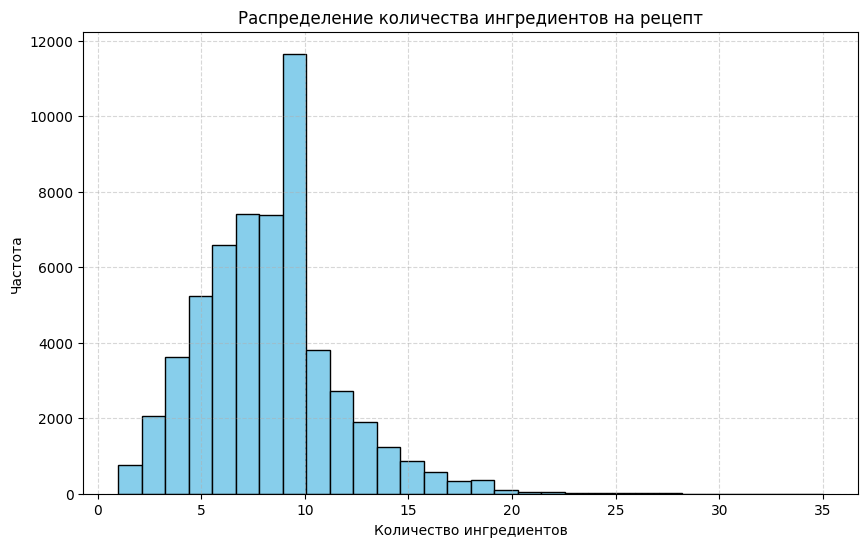

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Загрузка данных
df = pd.read_csv("List_of_Recipes.csv")

# Подсчёт количества ингредиентов в каждом рецепте
df['ingredients_count'] = df['nor_ingridients'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['ingredients_count'], bins=30, edgecolor='black', color='skyblue')
plt.title('Распределение количества ингредиентов на рецепт')
plt.xlabel('Количество ингредиентов')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

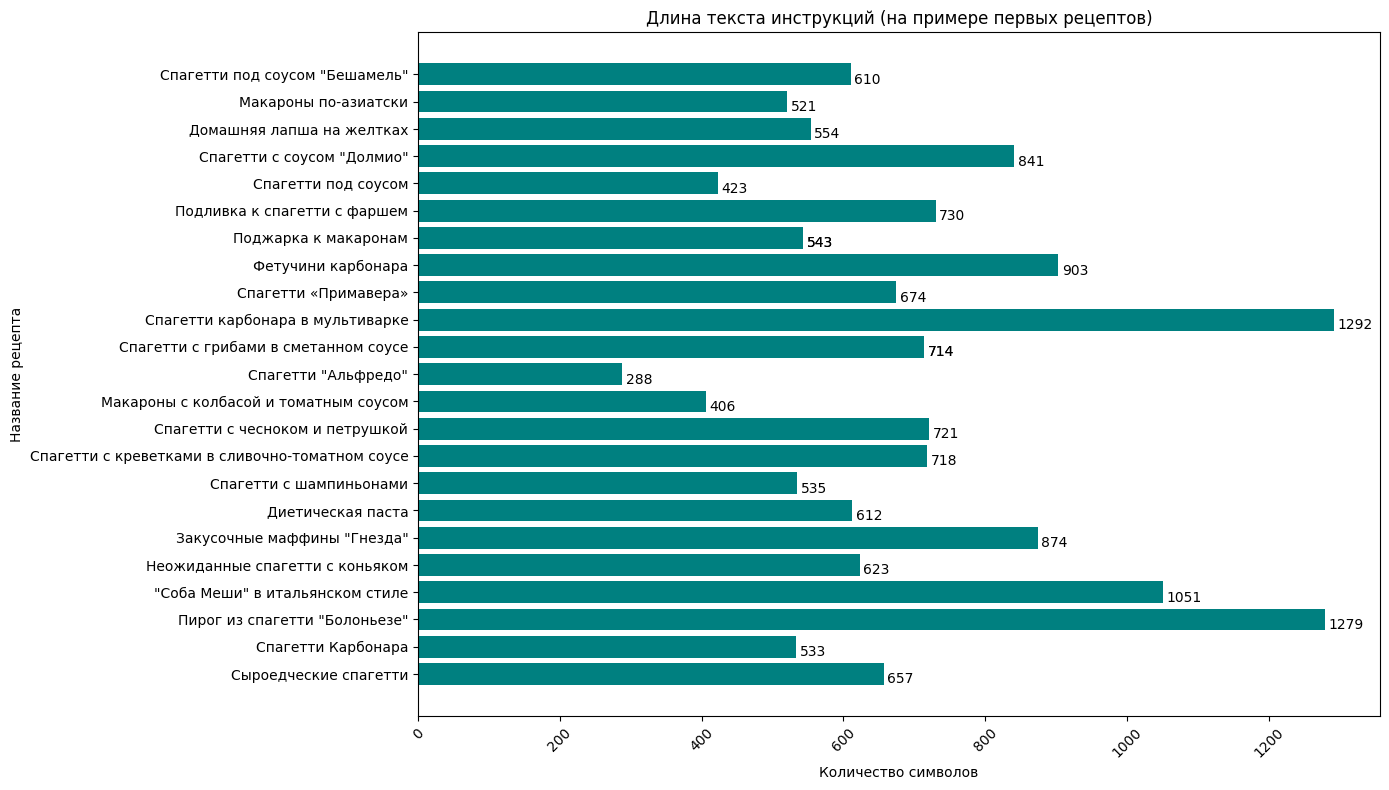

In [7]:
# Подсчёт длины текста инструкции
df['instructions_length'] = df['instructions'].str.len()

# Для упрощения построим среднюю длину по первым N записям
top_n = 25
sample_df = df.head(top_n)

# Столбчатая диаграмма
plt.figure(figsize=(14, 8))
bars = plt.barh(sample_df['name'], sample_df['instructions_length'], color='teal')
plt.title('Длина текста инструкций (на примере первых рецептов)')
plt.xlabel('Количество символов')
plt.ylabel('Название рецепта')
plt.xticks(rotation=45)
plt.tight_layout()

# Подписываем значения над столбцами
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + 0.2, f'{int(width)}', va='center')

plt.show()

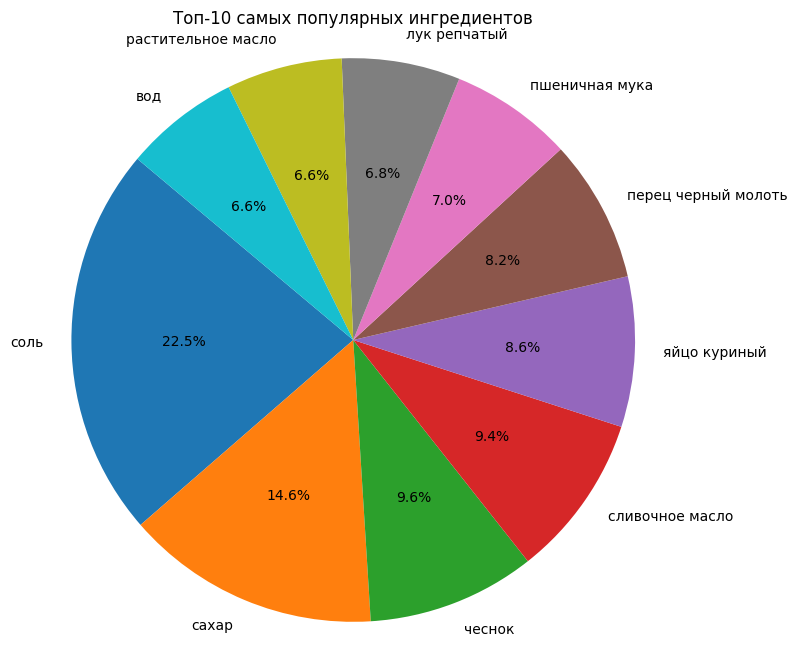

In [3]:

# Функция для извлечения всех ингредиентов
def extract_all_ingredients(df):
    all_ingredients = []
    for index, row in df.iterrows():
        try:
            ingredients = ast.literal_eval(row['nor_ingridients'])
            all_ingredients.extend(ingredients)
        except:
            continue
    return all_ingredients

# Получаем список всех ингредиентов
all_ingredients = extract_all_ingredients(df)

# Считаем частоту
ingredient_counts = Counter(all_ingredients)

# Оставляем только топ-10 самых популярных
top_ingredients = dict(ingredient_counts.most_common(10))

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(top_ingredients.values(), labels=top_ingredients.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Топ-10 самых популярных ингредиентов')
plt.axis('equal')  # чтобы круг был кругом
plt.show()

In [5]:
import pandas as pd
import ast

# Загрузка данных
df = pd.read_csv("List_of_Recipes.csv")

# Функция для подсчёта ингредиентов
def count_ingredients(row):
    try:
        ingredients = ast.literal_eval(row['nor_ingridients'])
        if isinstance(ingredients, list):
            return len(ingredients)
        else:
            return 0
    except:
        return 0

# Добавляем столбец с количеством ингредиентов
df['ingredients_count'] = df.apply(count_ingredients, axis=1)

# Считаем среднее
average_ingredients = df['ingredients_count'].mean()

# Округляем до двух знаков после запятой
average_ingredients_rounded = round(average_ingredients, 2)

# Выводим результат
print(f"📊 Среднее количество ингредиентов на рецепт: {average_ingredients_rounded}")

📊 Среднее количество ингредиентов на рецепт: 8.2


In [6]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("cleaned_recipes_inst.csv")

# Подсчёт длины текста в инструкциях
df['instructions_length'] = df['instructions'].str.len()

# Считаем метрики
average_length = round(df['instructions_length'].mean())
min_length = df['instructions_length'].min()
max_length = df['instructions_length'].max()

# Выводим результаты
print(f"📏 Средняя длина текста: {average_length} символов")
print(f"🔻 Минимальная длина: {min_length} символов")
print(f"🔺 Максимальная длина: {max_length} символов")

📏 Средняя длина текста: 679 символов
🔻 Минимальная длина: 27 символов
🔺 Максимальная длина: 7494 символов


In [8]:
# Импортируем библиотеки
from sentence_transformers import SentenceTransformer
import torch

# Загружаем предобученную модель
print("🧠 Загрузка модели...")
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Примеры текстов (рецептов)
text1 = "Спагетти с креветками в сливочном соусе"
text2 = "Паста с морепродуктами и белым соусом"
text3 = "Рецепт овощного супа с картошкой и морковью"

# Кодируем тексты в эмбеддинги
print("\n🧬 Кодирование текстов в эмбеддинги...")
embedding1 = model.encode(text1, convert_to_tensor=True)
embedding2 = model.encode(text2, convert_to_tensor=True)
embedding3 = model.encode(text3, convert_to_tensor=True)

# Выводим информацию об эмбеддингах
print(f"\n🔢 Форма эмбеддинга: {embedding1.shape} (размерность: {embedding1.shape[0]})")
print(f"🔤 Пример эмбеддинга для '{text1[:20]}...':")
print(embedding1[:10])  # Выводим только первые 10 чисел для наглядности

# Вычисляем косинусное сходство между парами текстов
from sentence_transformers import util

similarity_12 = util.cos_sim(embedding1, embedding2).item()
similarity_13 = util.cos_sim(embedding1, embedding3).item()

# Выводим результаты
print("\n📈 Косинусное сходство:")
print(f"'{text1}' vs '{text2}': {similarity_12:.4f}")
print(f"'{text1}' vs '{text3}': {similarity_13:.4f}")

if similarity_12 > similarity_13:
    print("✅ Текст 1 ближе к тексту 2 (похожие рецепты)")
else:
    print("❌ Текст 1 ближе к тексту 3 (менее похожие)")

c:\Users\mrcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🧠 Загрузка модели...

🧬 Кодирование текстов в эмбеддинги...

🔢 Форма эмбеддинга: torch.Size([384]) (размерность: 384)
🔤 Пример эмбеддинга для 'Спагетти с креветкам...':
tensor([-0.0359, -0.2614,  0.1626, -0.1316,  0.0169, -0.0691, -0.0107, -0.1869,
         0.0433, -0.2623])

📈 Косинусное сходство:
'Спагетти с креветками в сливочном соусе' vs 'Паста с морепродуктами и белым соусом': 0.7739
'Спагетти с креветками в сливочном соусе' vs 'Рецепт овощного супа с картошкой и морковью': 0.6191
✅ Текст 1 ближе к тексту 2 (похожие рецепты)
